# Fundamentals of Data Analysis

## Project Objective:

In this project we must perform and explain simple linear regression using Python on the powerproduction dataset available on Moodle

## Project Scope:

The goal is to accurately predict
wind turbine power output from wind speed values using the data set as a basis.
Your submission must be in the form of a git repository containing, at a minimum, the
following items:
1. Jupyter notebook.
2. Explanation of your regression and an analysis.
3. Standard items in a git repository such as a README.

### Let's get started !!!

## 1. Importing the required libraries

In [1]:
# Importing required libraries.
import pandas as pd
import seaborn as sns #visualisation
from matplotlib import pyplot as plt #visualisation
import math
import warnings
warnings.filterwarnings('ignore')

## 2. Load the Dataset

In [2]:
# Reading dataset.txt from directory:
df = pd.read_csv('dataset.txt', sep=",")

## 3. Displaying Dataset

In [3]:
# displaying dataset: 
# first 5 rows
df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [4]:
# last 5 rows
df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [5]:
# Shape of dataset:
# shape method returns a tuple of rows and column count.
df.shape

(500, 2)

## 4. Basic Description of the Dataset:

1. Total number of null values in each column

2. Total Number of filled values in each column

3. Information about each column

In [6]:
df.isnull().sum()

speed    0
power    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [8]:
df.describe().round(decimals=3) #understanding the descriptive statistics overview, with 2point decimals

,speed,power
count,500.000,500.000
mean,12.590,48.015
std,7.225,41.615
min,0.000,0.000
25%,6.325,5.288
50%,12.550,41.646
75%,18.775,93.537
max,25.000,113.556


## 5. Plot the data with it’s value count :

array([[<AxesSubplot:title={'center':'speed'}>,
        <AxesSubplot:title={'center':'power'}>]], dtype=object)

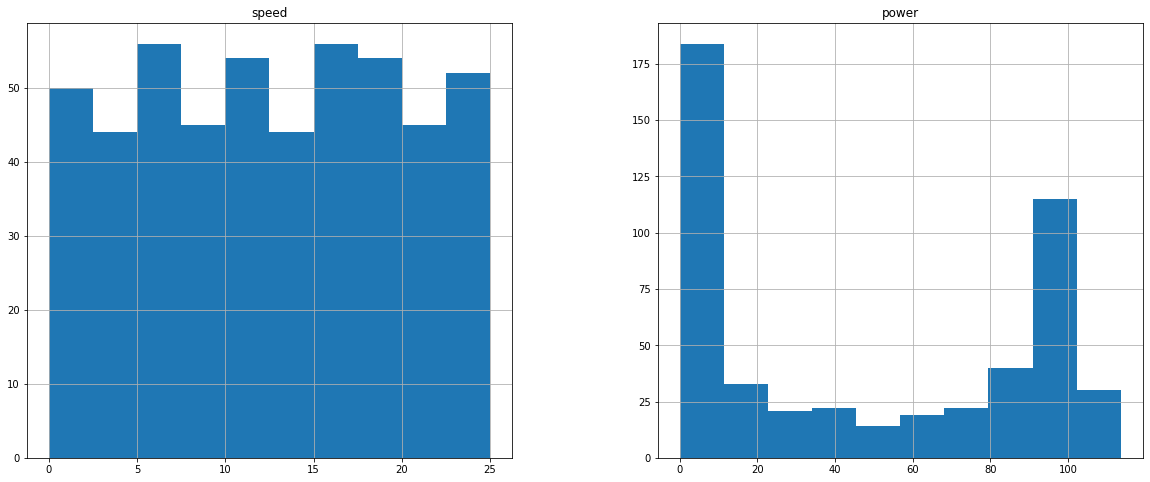

In [9]:
df.hist(figsize=(20,8))

## 6. Finding the relation between wind speed and power of turbine

Text(0.5, 1.0, 'Powerproduction scatter plot')

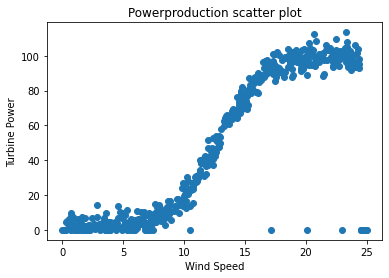

In [10]:
plt.scatter(df['speed'], df['power'])
plt.xlabel('Wind Speed')
plt.ylabel('Turbine Power')
plt.title('Powerproduction scatter plot')

<AxesSubplot:>

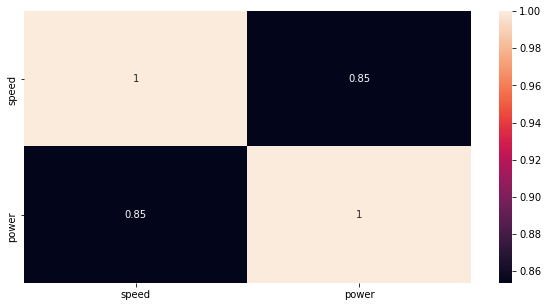

In [11]:
#creating a correlation heatmap from the dataframe
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

### Here we can see that we can easily plot a regression line in Speed VS Power plot.

## 7. Train and test split of dataset:
Now we will divide our dataset into 2 parts. One for training data and another for testing data. We’ll use 80% of the data for training and 20% of data to test our predictions.

In [12]:
length = int((len(df)*0.8))
train = df[:length]
test = df[length:]

print(train.shape)
print(test.shape)

(400, 2)
(100, 2)


## 8. Linear Regression
Linear Regression is an algorithm of machine learning for develop the relationship between a dependent variable as Y with either one or more than one independent variables as X. <br>
Pros of Linear Regression:<br>
Widely used<br>
Runs fast (usually not required high processing power)<br>
Easy to implement (not a lot of tuning required)<br>
Highly interpretable<br>
Basis of many methods<br>

In [13]:
# implementing linear regression algorithm  
def LinearRegression(train_x, train_y):
    X = train_x
    Y = train_y
    N = len(X)
    
    X_mean = X.mean()
    Y_mean = Y.mean()
    
    SumofXY = (X * Y).sum()
    SumofX  = X.sum()
    SumofY  = Y.sum()
    
    SumofXX = (X*X).sum()
    SquareofSumofX = (SumofX * SumofX)
    
    b =((N * SumofXY) - (SumofX * SumofY)) / ((N * SumofXX) - SquareofSumofX)
    
    a = Y_mean - b * X_mean
    
    return a, b
    

## 9. Fitting Model
Finally we can fit our compiled model on training_set the 85% of 500 records of dataset with the testing data 20% of testing_set.

In [14]:
a, b = LinearRegression(train['speed'], train['power'])

print("Intercept (a): ", a)
print("Slope (b): ",b)

Intercept (a):  -22.550828482729912
Slope (b):  6.002515399882907
